In [750]:
import cantera as ct
import numpy as np
import csv

# %config InlineBackend.figure_formats = ["svg"]
%matplotlib inline
import matplotlib.pylab as plt

print('running cantera version: ' + ct.__version__)

running cantera version: 3.0.0


In [751]:
gas = ct.Solution("data/chem.yaml")
gas.TPX = 700, 7*ct.one_atm, 'NH3: 1, HCLO4: 1'

C:\Users\tahze\AppData\Local\Temp\ipykernel_12344\1903923050.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in cp/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.3602934365979036
	Value computed using high-temperature polynomial: 2.9345266806587236

  gas = ct.Solution("data/chem.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_12344\1903923050.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in h/RT detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  -454.33184031861595
	Value computed using high-temperature polynomial: -401.57655092980355

  gas = ct.Solution("data/chem.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_12344\1903923050.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in s/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.335670747304918
	Value computed using high-temperature polynomial: 1.024867759488491

  gas = ct

In [752]:
gas()


  gas:

       temperature   700 K
          pressure   7.0928e+05 Pa
           density   7.1587 kg/m^3
  mean mol. weight   58.743 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             61135        3.5912e+06  J
   internal energy            -37944       -2.2289e+06  J
           entropy            4294.7        2.5228e+05  J/K
    Gibbs function       -2.9452e+06       -1.7301e+08  J
 heat capacity c_p            864.51             50784  J/K
 heat capacity c_v            722.97             42469  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               NH3           0.14496               0.5           -31.141
             HCLO4           0.85504               0.5            -28.31
     [  +34 minor]                 0                 0  



In [753]:
r = ct.IdealGasConstPressureReactor(gas)

# Create a reactor network
sim = ct.ReactorNet([r])

# Set the time step
time_step = 1e-5  # seconds
time = 0

temp = 700.0

In [754]:
max_frp = 0

dr = []
temp = []
temp_1 = []
t = []
x_nh3= []

while time < 3e-4:
    # forward_rates_of_progress
    # destruction_rates


    t.append(time)
    temp.append(gas.T)
    dr.append((gas.destruction_rates[gas.species_index('NH3')] + gas.destruction_rates[gas.species_index('HCLO4')])*1000*117.46*1e-6*(1/1.95)) #g/cm2/s -> cm/s
    x_nh3.append(gas.X[gas.species_index('NH3')]*1000)

    time += time_step
    sim.advance(time)

# molar mass of NH4CLO4 = 117.46
# density of AP solid = 1.95

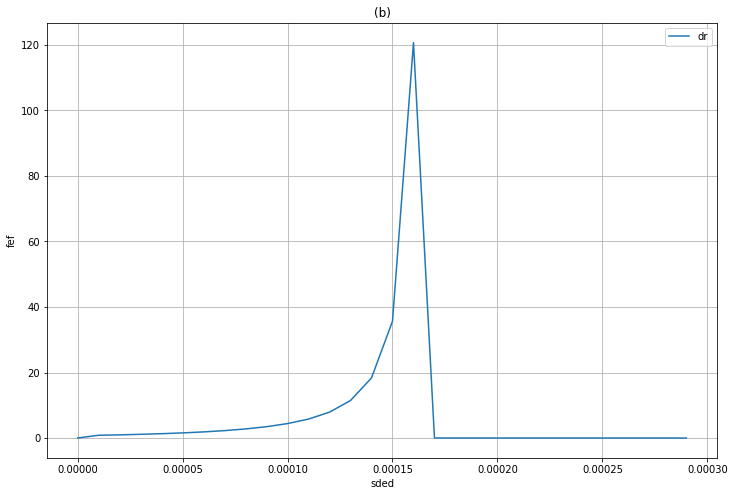

In [755]:
plt.figure(figsize=(12,8))

# plt.plot(t, temp, label='temp')
plt.plot(t, dr, label='dr')
# plt.plot(t, x_nh3)
plt.title('(b)')
plt.xlabel('sded')
plt.ylabel('fef')
plt.grid()
plt.legend()
plt.show()

In [756]:
for i, tem in enumerate(temp):
    if tem > 756:
        br = dr[i]
        break

br

18.349791122186325

In [757]:
dr

[0.02277101917689222,
 0.8410796662622608,
 0.9741976707628031,
 1.133251327596795,
 1.3269482420760599,
 1.567620600626429,
 1.8720599388738337,
 2.2634059093700674,
 2.7756686254001472,
 3.4622656546756345,
 4.4126242693886555,
 5.787373525537416,
 7.9020129308194,
 11.458884875743395,
 18.349791122186325,
 35.65754423207925,
 120.67949455725618,
 0.01350140040998742,
 0.000648051696014021,
 0.0006533643626386846,
 0.0006590704079133189,
 0.0006648055895352647,
 0.0006705714350751294,
 0.0006763670517663587,
 0.0006821914934138933,
 0.0006880437700395134,
 0.0006939228479931205,
 0.0006998276493719381,
 0.0007057570515691949,
 0.0007117098867213712]

In [758]:
dx = np.zeros_like(t)

de = np.diff(dr)
for i,d in enumerate(de):
    dx[i] = d

dx[0] = 0

thres = 4.4e-1
fin = 0
for i, d in enumerate(dr):
    if(dx[i] > thres):
        print(i)
        fin = d
        break

fin

7


2.2634059093700674

In [759]:
dr

[0.02277101917689222,
 0.8410796662622608,
 0.9741976707628031,
 1.133251327596795,
 1.3269482420760599,
 1.567620600626429,
 1.8720599388738337,
 2.2634059093700674,
 2.7756686254001472,
 3.4622656546756345,
 4.4126242693886555,
 5.787373525537416,
 7.9020129308194,
 11.458884875743395,
 18.349791122186325,
 35.65754423207925,
 120.67949455725618,
 0.01350140040998742,
 0.000648051696014021,
 0.0006533643626386846,
 0.0006590704079133189,
 0.0006648055895352647,
 0.0006705714350751294,
 0.0006763670517663587,
 0.0006821914934138933,
 0.0006880437700395134,
 0.0006939228479931205,
 0.0006998276493719381,
 0.0007057570515691949,
 0.0007117098867213712]

In [760]:
dx

array([ 0.00000000e+00,  1.33118005e-01,  1.59053657e-01,  1.93696914e-01,
        2.40672359e-01,  3.04439338e-01,  3.91345970e-01,  5.12262716e-01,
        6.86597029e-01,  9.50358615e-01,  1.37474926e+00,  2.11463941e+00,
        3.55687194e+00,  6.89090625e+00,  1.73077531e+01,  8.50219503e+01,
       -1.20665993e+02, -1.28533487e-02,  5.31266662e-06,  5.70604527e-06,
        5.73518162e-06,  5.76584554e-06,  5.79561669e-06,  5.82444165e-06,
        5.85227663e-06,  5.87907795e-06,  5.90480138e-06,  5.92940220e-06,
        5.95283515e-06,  0.00000000e+00])

In [761]:
x_nh3

[500.0,
 499.3111645601409,
 498.54009098143683,
 497.721055306692,
 496.8416767310908,
 495.8862133204662,
 494.8343887429373,
 493.66018781734226,
 492.32965007257934,
 490.79662384636646,
 488.9949039077965,
 486.8232659438342,
 484.11467515540977,
 480.5646340477428,
 475.5310090632699,
 467.28230851530907,
 447.7355950084871,
 0.00021007992462679964,
 9.036544178830962e-06,
 9.081731707266065e-06,
 9.135841578033271e-06,
 9.189985050919493e-06,
 9.244164382199376e-06,
 9.298366757897398e-06,
 9.352578941630978e-06,
 9.406787339746728e-06,
 9.46097800611062e-06,
 9.515136643213691e-06,
 9.569248604074461e-06,
 9.623298893583516e-06]

In [762]:
for i, x in enumerate(x_nh3):
    if x < 0.491:
        br = dr[i]
        break

br

0.01350140040998742